Problem Statement

The goal is to classify iris flowers into one of three species (Setosa, Versicolor, or Virginica) using measurements of sepal length, sepal width, petal length, and petal width from the Iris dataset.

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Arcite\Desktop\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
from sklearn.model_selection import train_test_split
X=df.drop('species',axis=1)
y=df['species']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=(0.33))


In [8]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
X_train

array([[-0.13835603, -0.25606255,  0.22188787,  0.11008189],
       [ 2.14752625, -0.01449411,  1.61230796,  1.18405156],
       [-0.25866563, -0.01449411,  0.39569038,  0.37857431],
       [-0.8602136 ,  1.19334812, -1.4002689 , -1.36662641],
       [ 2.26783585, -0.497631  ,  1.67024213,  1.04980535],
       [-0.01804644, -0.73919944,  0.1639537 , -0.29265674],
       [-0.739904  ,  0.95177968, -1.4002689 , -1.36662641],
       [-0.98052319,  1.19334812, -1.45820307, -1.2323802 ],
       [-0.8602136 ,  1.91805346, -1.11059804, -1.09813399],
       [-0.98052319, -2.43017856, -0.18365132, -0.29265674],
       [ 0.58350153, -0.73919944,  0.62742706,  0.78131293],
       [-1.22114238,  0.95177968, -1.11059804, -1.36662641],
       [-0.98052319, -0.01449411, -1.28440056, -1.36662641],
       [-0.8602136 ,  0.71021123, -1.22646639, -0.96388778],
       [-0.25866563, -0.73919944,  0.22188787,  0.11008189],
       [-0.8602136 ,  0.95177968, -1.34233473, -1.36662641],
       [-0.13835603, -0.

In [10]:
y_train

96     1
105    2
66     1
0      0
122    2
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 100, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [13]:
y_pred=model.predict(X_test)

In [14]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)

In [16]:
accuracy

0.98

In [17]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [19]:
from sklearn.naive_bayes import GaussianNB


In [20]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [21]:
y_pred_nb=nb_model.predict(X_test)

In [22]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_nb=accuracy_score(y_test,y_pred_nb)
accuracy_nb

0.96

In [24]:
confusion_matrix(y_test,y_pred_nb)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

In [25]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [26]:
X=df.drop('species',axis=1)
y=df['species']
from sklearn.model_selection import train_test_split
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X,y,random_state=42,test_size=(0.33))

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt,y_train_dt)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
y_pred_dt=dt_model.predict(X_test_dt)

In [30]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(y_test_dt,y_pred_dt)
accuracy_dt

0.98

In [32]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test_dt,y_pred_dt)
cm_dt

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
k_model_1= KNeighborsClassifier(n_neighbors=3)
k_model_1.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [35]:
y_pred_1=k_model_1.predict(X_test)
y_pred_1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [36]:
accuracy_k_1=accuracy_score(y_test,y_pred_1)
accuracy_k_1

0.98

In [37]:
cm_k_1=confusion_matrix(y_test,y_pred_1)
cm_k_1

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [38]:
k_model_2= KNeighborsClassifier(n_neighbors=7)
k_model_2.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
y_pred_2=k_model_2.predict(X_test)
y_pred_2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [40]:
accuracy_k_2=accuracy_score(y_test,y_pred_2)
accuracy_k_2

0.98

In [41]:
cm_k_2=confusion_matrix(y_test,y_pred_2)
cm_k_2

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [42]:
k_model_3= KNeighborsClassifier(n_neighbors=11)
k_model_3.fit(X_train, y_train)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
y_pred_3=k_model_3.predict(X_test)
y_pred_3

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [44]:
accuracy_k_3=accuracy_score(y_test,y_pred_3)
accuracy_k_3

0.98

In [45]:
cm_k_3=confusion_matrix(y_test,y_pred_3)
cm_k_3

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [46]:
k_model_4= KNeighborsClassifier(n_neighbors=9)
k_model_4.fit(X_train, y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
y_pred_4=k_model_4.predict(X_test)
y_pred_4

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [48]:
accuracy_k_4=accuracy_score(y_test,y_pred_4)
accuracy_k_4

0.98

In [49]:
cm_k_4=confusion_matrix(y_test,y_pred_4)
cm_k_4

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [50]:
k_model_5= KNeighborsClassifier(n_neighbors=5)
k_model_5.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
y_pred_5=k_model_5.predict(X_test)
y_pred_5

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [52]:
accuracy_k_5=accuracy_score(y_test,y_pred_5)
accuracy_k_5

0.98

In [53]:
cm_k_5=confusion_matrix(y_test,y_pred_5)
cm_k_5

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [54]:
K=[3,7,11,9,5]

In [55]:
V=[0.98,0.98,0.98,0.98,0.98]

In [56]:
import seaborn as sns

<Axes: >

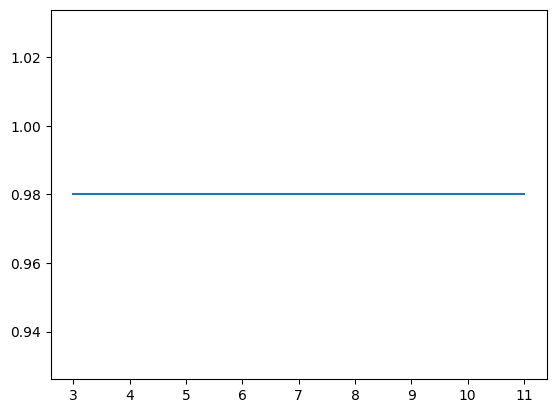

In [57]:
sns.lineplot(x=K, y=V)


In [58]:
from sklearn.svm import SVC


In [75]:
cs=SVC(kernel='rbf')
cs.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [76]:
y_pred_cs=cs.predict(X_test)
y_pred_cs

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [77]:
accuracy=accuracy_score(y_test,y_pred_cs)
accuracy

0.98

In [78]:
cm_cs=confusion_matrix(y_test,y_pred_cs)
cm_cs

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [79]:
s={"Model":["LOGISTIC","NAIVE BAYES","DECISION TREE","KNN","SVC"],
"Accuracy":[0.98,0.96,0.98,0.98,0.98]}

In [80]:
df=pd.DataFrame(s)

In [81]:
df

,Model,Accuracy
0,LOGISTIC,0.98
1,NAIVE BAYES,0.96
2,DECISION TREE,0.98
3,KNN,0.98
4,SVC,0.98


<Axes: xlabel='Model', ylabel='Accuracy'>

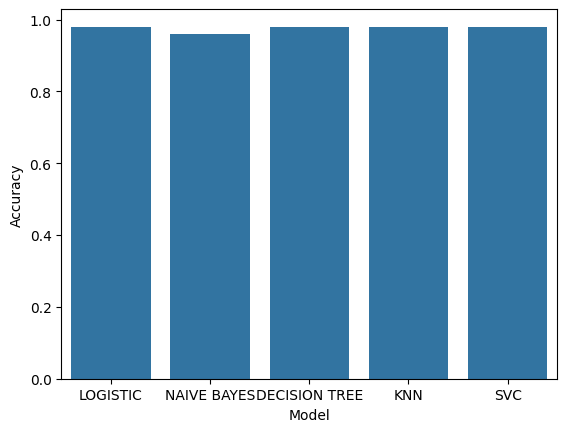

In [82]:
sns.barplot(data=df,x="Model",y="Accuracy")

Using the Iris Dataset,
Logistic Regression,Decision Tree and SVC achieved the Highest accuracy of 98% indicating excellent classification performance,while Naive Bayes showed slightly lower accuracy at 96%.Since several models performed similarly,the final model can be choosen based on simplicity and computational efficiency